In [1]:
___Author___='LumberJack Jyss'

In [2]:
print('LumberJack BRUTAL AtidotCom KerasT\nLumberJack Jyss (c)')

LumberJack BRUTAL AtidotCom KerasT
LumberJack Jyss (c)


In [3]:
print('Importation des librairies...')
import statistics
import pickle
#import talib
#import time
#from datetime import date,datetime
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import pandas_datareader as web
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
print('Librairies importées')

Importation des librairies...


Using TensorFlow backend.


Librairies importées


In [4]:
# fix random seed for reproducibility
seed = 770
np.random.seed(seed)

In [5]:
df = pd.read_csv('dataset_ready_to_use.csv')

In [6]:
df = df.dropna()

In [7]:
df.set_index('Local time', inplace=True)
df = df.iloc[:,1:]
df.head()

,Open_audusd,High_audusd,Low_audusd,Close_audusd,Volume_audusd,Open_usdjpy,High_usdjpy,Low_usdjpy,Close_usdjpy,Volume_usdjpy,...,Close_eurusd,Volume_eurusd,Macdsignal_eurusd,rsi_eurusd,BBup_eurusd,BBmid_eurusd,BBlow_eurusd,atr_eurusd,wclprince_eurusd,trend
Local time,,,,,,,,,,,,,,,,,,,,,
10.04.2004 02:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,1.20888,0.0,-0.003009,37.355005,1.210666,1.209442,1.208217,0.001222,1.20888,0.0
10.04.2004 03:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,1.20888,0.0,-0.003035,37.355005,1.210610,1.209471,1.208331,0.001134,1.20888,0.0
10.04.2004 04:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,1.20888,0.0,-0.003060,37.355005,1.210553,1.209414,1.208275,0.001053,1.20888,0.0
10.04.2004 05:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,1.20888,0.0,-0.003084,37.355005,1.210526,1.209373,1.208219,0.000978,1.20888,0.0
10.04.2004 06:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,1.20888,0.0,-0.003107,37.355005,1.210429,1.209311,1.208192,0.000908,1.20888,0.0


In [8]:
#delta = round((date(simanim.index[simanim.shape[0]-1].year,\
 #                   simanim.index[simanim.shape[0]-1].month,simanim.index[simanim.shape[0]-1].day)\
  #             -date(simanim.index[0].year,simanim.index[0].month,simanim.index[0].day)).days)
delta = df.shape[0]
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')

Période d'étude :  131564
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  105251  jours 
Bloc 2 : 26313  jours


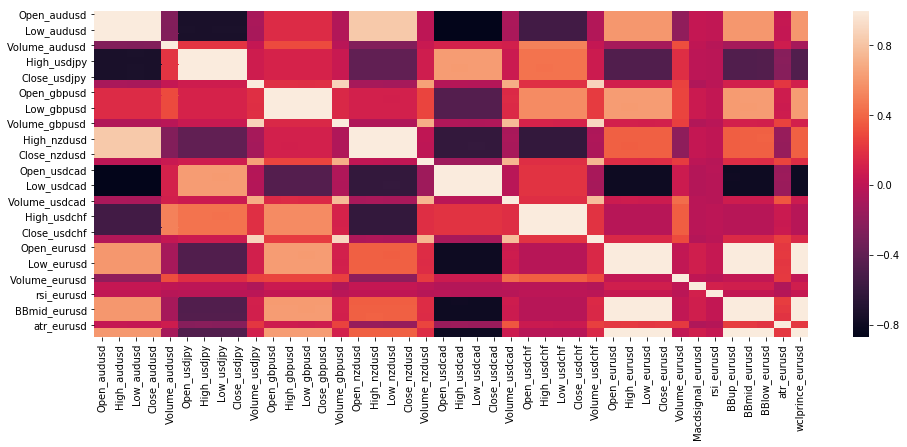

In [9]:
plt.figure(figsize=(16,6))
sns.heatmap(df.iloc[:,:-1].corr())
plt.show()

In [10]:
df['trend'].sum()

5593.0

In [11]:
X = df.iloc[:,:-1].astype(float)
Y = df.iloc[:,-1]

In [12]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [13]:
# baseline model
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(60, input_dim=42, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=1)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/100
118406/118406 [==============================] - 25s 215us/step - loss: 0.6819 - acc: 0.9574
Epoch 2/100
118406/118406 [==============================] - 25s 212us/step - loss: 0.6810 - acc: 0.9575
Epoch 3/100
118406/118406 [==============================] - 25s 213us/step - loss: 0.6851 - acc: 0.9575
Epoch 4/100
118406/118406 [==============================] - 25s 213us/step - loss: 0.6851 - acc: 0.9575
Epoch 5/100
118406/118406 [==============================] - 25s 213us/step - loss: 0.6851 - acc: 0.9575
Epoch 6/100
118406/118406 [==============================] - 26s 216us/step - loss: 0.6851 - acc: 0.9575
Epoch 7/100
118406/118406 [==============================] - 25s 215us/step - loss: 0.6851 - acc: 0.9575
Epoch 8/100
118406/118406 [==============================] - 25s 215us/step - loss: 0.6851 - acc: 0.9575
Epoch 9/100
118406/118406 [==============================] - 26s 215us/step - loss: 0.6851 - acc: 0.9575
Epoch 10/100
118406/118406 [===========================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



118407/118407 [==============================] - 26s 223us/step - loss: 0.6851 - acc: 0.9575
Epoch 96/100
118407/118407 [==============================] - 26s 223us/step - loss: 0.6851 - acc: 0.9575
Epoch 97/100
118407/118407 [==============================] - 26s 223us/step - loss: 0.6851 - acc: 0.9575
Epoch 98/100
118407/118407 [==============================] - 26s 223us/step - loss: 0.6851 - acc: 0.9575
Epoch 99/100
118407/118407 [==============================] - 26s 223us/step - loss: 0.6851 - acc: 0.9575
Epoch 100/100
13157/13157 [==============================] - 1s 107us/step
Epoch 1/100
 15365/118408 [==>...........................] - ETA: 24s - loss: 0.6831 - acc: 0.9572

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



118408/118408 [==============================] - 26s 222us/step - loss: 0.6852 - acc: 0.9575
Epoch 6/100
118408/118408 [==============================] - 26s 223us/step - loss: 0.6852 - acc: 0.9575
Epoch 7/100
118408/118408 [==============================] - 26s 223us/step - loss: 0.6852 - acc: 0.9575
Epoch 8/100
118408/118408 [==============================] - 26s 222us/step - loss: 0.6852 - acc: 0.9575
Epoch 9/100
118408/118408 [==============================] - 26s 222us/step - loss: 0.6852 - acc: 0.9575
Epoch 10/100
116070/118408 [============================>.] - ETA: 0s - loss: 0.6849 - acc: 0.9575

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



118408/118408 [==============================] - 26s 222us/step - loss: 0.6852 - acc: 0.9575
Epoch 17/100
118408/118408 [==============================] - 26s 221us/step - loss: 0.6852 - acc: 0.9575
Epoch 18/100
118408/118408 [==============================] - 26s 222us/step - loss: 0.6852 - acc: 0.9575
Epoch 19/100
118408/118408 [==============================] - 26s 223us/step - loss: 0.6852 - acc: 0.9575
Epoch 20/100
118408/118408 [==============================] - 26s 221us/step - loss: 0.6852 - acc: 0.9575
Epoch 21/100
106490/118408 [=========================>....] - ETA: 2s - loss: 0.6870 - acc: 0.9574

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



118408/118408 [==============================] - 26s 222us/step - loss: 0.6852 - acc: 0.9575
Epoch 28/100
118408/118408 [==============================] - 26s 222us/step - loss: 0.6852 - acc: 0.9575
Epoch 29/100
118408/118408 [==============================] - 26s 221us/step - loss: 0.6852 - acc: 0.9575
Epoch 30/100
118408/118408 [==============================] - 26s 221us/step - loss: 0.6852 - acc: 0.9575
Epoch 31/100
118408/118408 [==============================] - 26s 221us/step - loss: 0.6852 - acc: 0.9575
Epoch 32/100
100655/118408 [========================>.....] - ETA: 3s - loss: 0.6879 - acc: 0.9573

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



118408/118408 [==============================] - 28s 234us/step - loss: 0.6852 - acc: 0.9575
Epoch 37/100
118408/118408 [==============================] - 27s 228us/step - loss: 0.6852 - acc: 0.9575
Epoch 38/100
118408/118408 [==============================] - 27s 229us/step - loss: 0.6852 - acc: 0.9575
Epoch 39/100
118408/118408 [==============================] - 27s 227us/step - loss: 0.6852 - acc: 0.9575
Epoch 40/100
118408/118408 [==============================] - 27s 230us/step - loss: 0.6852 - acc: 0.9575
Epoch 41/100
118408/118408 [==============================] - 27s 228us/step - loss: 0.6852 - acc: 0.9575
Epoch 42/100
 53845/118408 [============>.................] - ETA: 14s - loss: 0.6726 - acc: 0.9583

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



118408/118408 [==============================] - 27s 232us/step - loss: 0.6852 - acc: 0.9575
Epoch 48/100
118408/118408 [==============================] - 27s 231us/step - loss: 0.6852 - acc: 0.9575
Epoch 49/100
118408/118408 [==============================] - 27s 229us/step - loss: 0.6852 - acc: 0.9575
Epoch 50/100
118408/118408 [==============================] - 27s 228us/step - loss: 0.6852 - acc: 0.9575
Epoch 51/100
118408/118408 [==============================] - 27s 230us/step - loss: 0.6852 - acc: 0.9575
Epoch 52/100
118408/118408 [==============================] - 27s 229us/step - loss: 0.6852 - acc: 0.9575
Epoch 53/100
 25345/118408 [=====>........................] - ETA: 21s - loss: 0.6665 - acc: 0.9587

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



118408/118408 [==============================] - 27s 231us/step - loss: 0.6852 - acc: 0.9575
Epoch 59/100
118408/118408 [==============================] - 27s 229us/step - loss: 0.6852 - acc: 0.9575
Epoch 60/100
118408/118408 [==============================] - 27s 230us/step - loss: 0.6852 - acc: 0.9575
Epoch 61/100
118408/118408 [==============================] - 27s 229us/step - loss: 0.6852 - acc: 0.9575
Epoch 62/100
118408/118408 [==============================] - 27s 231us/step - loss: 0.6852 - acc: 0.9575
Epoch 63/100
 88920/118408 [=====================>........] - ETA: 6s - loss: 0.6819 - acc: 0.9577

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



118408/118408 [==============================] - 27s 230us/step - loss: 0.6852 - acc: 0.9575
Epoch 69/100
118408/118408 [==============================] - 27s 228us/step - loss: 0.6852 - acc: 0.9575
Epoch 70/100
118408/118408 [==============================] - 27s 226us/step - loss: 0.6852 - acc: 0.9575
Epoch 71/100
118408/118408 [==============================] - 27s 225us/step - loss: 0.6852 - acc: 0.9575
Epoch 72/100
118408/118408 [==============================] - 27s 226us/step - loss: 0.6852 - acc: 0.9575
Epoch 73/100
114095/118408 [===========================>..] - ETA: 0s - loss: 0.6867 - acc: 0.9574

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



118408/118408 [==============================] - 27s 227us/step - loss: 0.6852 - acc: 0.9575
Epoch 79/100
118408/118408 [==============================] - 27s 226us/step - loss: 0.6852 - acc: 0.9575
Epoch 80/100
118408/118408 [==============================] - 27s 227us/step - loss: 0.6852 - acc: 0.9575
Epoch 81/100
118408/118408 [==============================] - 27s 226us/step - loss: 0.6852 - acc: 0.9575
Epoch 82/100
118408/118408 [==============================] - 27s 226us/step - loss: 0.6852 - acc: 0.9575
Epoch 83/100
 94350/118408 [======================>.......] - ETA: 5s - loss: 0.6891 - acc: 0.9572

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



118408/118408 [==============================] - 26s 221us/step - loss: 0.6852 - acc: 0.9575
Epoch 90/100
118408/118408 [==============================] - 26s 222us/step - loss: 0.6852 - acc: 0.9575
Epoch 91/100
118408/118408 [==============================] - 26s 222us/step - loss: 0.6852 - acc: 0.9575
Epoch 92/100
118408/118408 [==============================] - 26s 222us/step - loss: 0.6852 - acc: 0.9575
Epoch 93/100
118408/118408 [==============================] - 27s 228us/step - loss: 0.6852 - acc: 0.9575
Epoch 94/100
118408/118408 [==============================] - 26s 224us/step - loss: 0.6852 - acc: 0.9575
Epoch 95/100
 34545/118408 [=======>......................] - ETA: 18s - loss: 0.6728 - acc: 0.9583

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



118408/118408 [==============================] - 27s 225us/step - loss: 0.6857 - acc: 0.9574
Epoch 2/100
118408/118408 [==============================] - 27s 224us/step - loss: 0.6852 - acc: 0.9575
Epoch 3/100
118408/118408 [==============================] - 26s 224us/step - loss: 0.6852 - acc: 0.9575
Epoch 4/100
118408/118408 [==============================] - 27s 224us/step - loss: 0.6852 - acc: 0.9575
Epoch 5/100
118408/118408 [==============================] - 27s 225us/step - loss: 0.6852 - acc: 0.9575
Epoch 6/100


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



118408/118408 [==============================] - 26s 223us/step - loss: 0.6852 - acc: 0.9575
Epoch 12/100
118408/118408 [==============================] - 26s 224us/step - loss: 0.6852 - acc: 0.9575
Epoch 13/100
118408/118408 [==============================] - 27s 224us/step - loss: 0.6852 - acc: 0.9575
Epoch 14/100
118408/118408 [==============================] - 26s 224us/step - loss: 0.6852 - acc: 0.9575
Epoch 15/100
118408/118408 [==============================] - 27s 224us/step - loss: 0.6852 - acc: 0.9575
Epoch 16/100
118408/118408 [==============================] - 26s 223us/step - loss: 0.6852 - acc: 0.9575
Epoch 17/100
 75525/118408 [==================>...........] - ETA: 9s - loss: 0.6968 - acc: 0.9568

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



118408/118408 [==============================] - 27s 225us/step - loss: 0.6852 - acc: 0.9575
Epoch 23/100
118408/118408 [==============================] - 26s 223us/step - loss: 0.6852 - acc: 0.9575
Epoch 24/100
118408/118408 [==============================] - 27s 224us/step - loss: 0.6852 - acc: 0.9575
Epoch 25/100
118408/118408 [==============================] - 26s 223us/step - loss: 0.6852 - acc: 0.9575
Epoch 26/100
118408/118408 [==============================] - 27s 224us/step - loss: 0.6852 - acc: 0.9575
Epoch 27/100
103885/118408 [=========================>....] - ETA: 3s - loss: 0.6879 - acc: 0.9573

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



118408/118408 [==============================] - 26s 224us/step - loss: 0.6852 - acc: 0.9575
Epoch 33/100
118408/118408 [==============================] - 26s 224us/step - loss: 0.6852 - acc: 0.9575
Epoch 34/100
118408/118408 [==============================] - 26s 223us/step - loss: 0.6852 - acc: 0.9575
Epoch 35/100
118408/118408 [==============================] - 27s 224us/step - loss: 0.6852 - acc: 0.9575
Epoch 36/100
118408/118408 [==============================] - 26s 223us/step - loss: 0.6852 - acc: 0.9575
Epoch 37/100
118408/118408 [==============================] - 26s 224us/step - loss: 0.6852 - acc: 0.9575
Epoch 38/100
  3375/118408 [..............................] - ETA: 26s - loss: 0.6973 - acc: 0.9567

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



118408/118408 [==============================] - 26s 223us/step - loss: 0.6852 - acc: 0.9575
Epoch 45/100
118408/118408 [==============================] - 26s 223us/step - loss: 0.6852 - acc: 0.9575
Epoch 46/100
118408/118408 [==============================] - 26s 223us/step - loss: 0.6852 - acc: 0.9575
Epoch 47/100
118408/118408 [==============================] - 26s 223us/step - loss: 0.6852 - acc: 0.9575
Epoch 48/100
118408/118408 [==============================] - 26s 223us/step - loss: 0.6852 - acc: 0.9575
Epoch 49/100
 79195/118408 [===================>..........] - ETA: 8s - loss: 0.6696 - acc: 0.9585

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



118408/118408 [==============================] - 26s 223us/step - loss: 0.6852 - acc: 0.9575
Epoch 55/100
118408/118408 [==============================] - 27s 226us/step - loss: 0.6852 - acc: 0.9575
Epoch 56/100
118408/118408 [==============================] - 27s 227us/step - loss: 0.6852 - acc: 0.9575
Epoch 57/100
118408/118408 [==============================] - 27s 228us/step - loss: 0.6852 - acc: 0.9575
Epoch 58/100
118408/118408 [==============================] - 27s 230us/step - loss: 0.6852 - acc: 0.9575
Epoch 64/100
118408/118408 [==============================] - 27s 228us/step - loss: 0.6852 - acc: 0.9575
Epoch 65/100
118408/118408 [==============================] - 27s 228us/step - loss: 0.6852 - acc: 0.9575
Epoch 66/100
118408/118408 [==============================] - 27s 228us/step - loss: 0.6852 - acc: 0.9575
Epoch 67/100
118408/118408 [==============================] - 27s 228us/step - loss: 0.6852 - acc: 0.9575
Epoch 68/100
118408/118408 [==============================]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



118408/118408 [==============================] - 27s 228us/step - loss: 0.6852 - acc: 0.9575
Epoch 75/100
118408/118408 [==============================] - 27s 229us/step - loss: 0.6852 - acc: 0.9575
Epoch 76/100
118408/118408 [==============================] - 27s 228us/step - loss: 0.6852 - acc: 0.9575
Epoch 77/100
118408/118408 [==============================] - 27s 228us/step - loss: 0.6852 - acc: 0.9575
Epoch 78/100
118408/118408 [==============================] - 27s 228us/step - loss: 0.6852 - acc: 0.9575
Epoch 79/100
118408/118408 [==============================] - 27s 228us/step - loss: 0.6852 - acc: 0.9575
Epoch 80/100
 27325/118408 [=====>........................] - ETA: 20s - loss: 0.6742 - acc: 0.9582

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



118408/118408 [==============================] - 27s 228us/step - loss: 0.6852 - acc: 0.9575
Epoch 84/100
118408/118408 [==============================] - 27s 228us/step - loss: 0.6852 - acc: 0.9575
Epoch 85/100
118408/118408 [==============================] - 27s 229us/step - loss: 0.6852 - acc: 0.9575
Epoch 86/100
118408/118408 [==============================] - 27s 229us/step - loss: 0.6852 - acc: 0.9575
Epoch 87/100
118408/118408 [==============================] - 27s 228us/step - loss: 0.6852 - acc: 0.9575
Epoch 88/100
 90805/118408 [======================>.......] - ETA: 6s - loss: 0.6834 - acc: 0.9576

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



118408/118408 [==============================] - 27s 232us/step - loss: 0.6852 - acc: 0.9575
Epoch 93/100
118408/118408 [==============================] - 29s 243us/step - loss: 0.6852 - acc: 0.9575
Epoch 94/100
118408/118408 [==============================] - 27s 231us/step - loss: 0.6852 - acc: 0.9575
Epoch 95/100
118408/118408 [==============================] - 28s 233us/step - loss: 0.6852 - acc: 0.9575
Epoch 96/100
118408/118408 [==============================] - 27s 231us/step - loss: 0.6852 - acc: 0.9575
Epoch 97/100
118408/118408 [==============================] - 27s 231us/step - loss: 0.6852 - acc: 0.9575
Epoch 98/100
118408/118408 [==============================] - 28s 234us/step - loss: 0.6852 - acc: 0.9575
Epoch 99/100
118408/118408 [==============================] - 27s 230us/step - loss: 0.6852 - acc: 0.9575
Epoch 100/100
13156/13156 [==============================] - 2s 115us/step
Epoch 1/100
118408/118408 [==============================] - 28s 239us/step - loss: 0.6951

In [ ]:
# evaluate baseline model with standardized dataset
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=1)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
# smaller model
def create_smaller():
	# create model
	model = Sequential()
	model.add(Dense(30, input_dim=42, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
# larger model
def create_larger():
	# create model
	model = Sequential()
	model.add(Dense(60, input_dim=42, kernel_initializer='normal', activation='relu'))
	model.add(Dense(30, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=100, batch_size=5, verbose=1)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [90]:
backtest = pd.concat((backtest,trend_df),axis=1)

In [91]:
backtest.tail(),trend_df.sum(), backtest.shape

(                                  Close_eurusd  trend
 Local time                                           
 13.04.2019 17:00:00.000 GMT+0200       1.13006    0.0
 13.04.2019 18:00:00.000 GMT+0200       1.13006    0.0
 13.04.2019 19:00:00.000 GMT+0200       1.13006    0.0
 13.04.2019 20:00:00.000 GMT+0200       1.13006    0.0
 13.04.2019 21:00:00.000 GMT+0200       1.13006    0.0, trend    0.0
 dtype: float64, (131564, 2))

In [92]:
backtest = backtest.iloc[118000:,:]

In [93]:
base_test = df.iloc[118000:,:]

In [102]:
trend_label = []
trend_label4 = []
var_list = [0]
target = 0.003
stop_loss = 0.0015
equity_list = [0]
equity = 100000
col_open_pos = [0]
col_close_pos = [0]
col_is_win = [0]
col_profit = [0]
col_cours = [0]
max_gain = (0,0)
max_loss = (0,0)
pos = 0
a = 0
nb_transactions = 0

for i in range(0,backtest.shape[0]):
    candle_close = float(base_test.iloc[i,33])
    candle_open = float(base_test.iloc[i,30])
    candle_high = float(base_test.iloc[i,31])
    candle_low = float(base_test.iloc[i,32])
    trend = backtest.iloc[i,1]
    
    
    if a == 0:
        pos = 0
    elif a == 1:
        pos = 1
    
    if trend == 1 and pos == 0:
        a = 1
        nb_transactions+=1
        equity = equity - 1.5
        col_open_pos.append(1)
        equity_list.append(equity)
        var_list.append(0)
        price_buy = candle_open
        col_cours.append(price_buy)
        col_profit.append(0)
        print('\033[94m \n',backtest.index[i])
        print("\033[94m Ouverture de position de $100,000")
        print("\033[94m Prix d'achat =$",price_buy)
        var = candle_close-price_buy
        
    
    elif trend == 1 and pos == 1:
        var_list.append(0)
        equity_list.append(equity)
        col_profit.append(0)
    
    elif trend == 0 and pos == 1:
        var = candle_close-price_buy

        if var > target or var < stop_loss :
            price_sell = candle_close
            a = 0
            nb_transactions+=1
            col_close_pos.append(1)
            equity = equity - 1.5 + (price_sell-price_buy)*100000
            
            if (price_sell-price_buy)*100000 > max_gain[1]:
                max_gain = (i,(price_sell-price_buy)*100000)
                
            elif (price_sell-price_buy)*100000 < max_loss[1]:
                max_loss = (i,(price_sell-price_buy)*100000)
                
            equity_list.append(equity)
            var_list.append(var)
            col_cours.append(price_sell)
            print('\n\033[92m \n',backtest.index[i+1])
            print("\033[92m Cloture de position")
            print("\033[92m Prix de cloture = $",price_sell)
            print('pnl : ',(price_sell-price_buy)*100000)
            
            if var > 0:
                col_is_win.append(1)
                col_profit.append((price_sell-price_buy)*100000)
            else :
                col_profit.append((price_sell-price_buy)*100000)
                col_is_win.append(0)
        
        if var < target and var > stop_loss:
            var_list.append(0)
            equity_list.append(equity)
            col_profit.append(0)
            
    elif trend == 0 and pos == 0:
        var_list.append(0)
        equity_list.append(equity)
        col_profit.append(0)
        
        
        
        
        
        
var_dtf = pd.DataFrame()
var_dtf['Variations'] = var_list
var_dtf['Equity'] = equity_list
print("\n\033[95m \033[1m Les gains faramineux s'élèvent à : $",equity-100000,'!. En ',nb_transactions,' transactions.' )


  Les gains faramineux s'élèvent à : $ 0 !. En  0  transactions.


In [103]:
len(equity_list),len(var_list),len(col_profit),backtest['trend'].sum(),nb_transactions,equity-100000

(13565, 13565, 13565, 0.0, 0, 0)

In [96]:
gain_sum = 0
loss_sum = 0
for i in range(len(col_profit)):
    if col_profit[i]>0:
        gain_sum+=col_profit[i]
    else :
        loss_sum+=col_profit[i]
        

In [97]:
backtest_graph = pd.DataFrame()
backtest_graph['equity'] = equity_list
backtest_graph['col_profit'] = col_profit
#backtest_graph['col_is_win'] = col_is_win
#backtest_graph['col_cours'] = col_cours

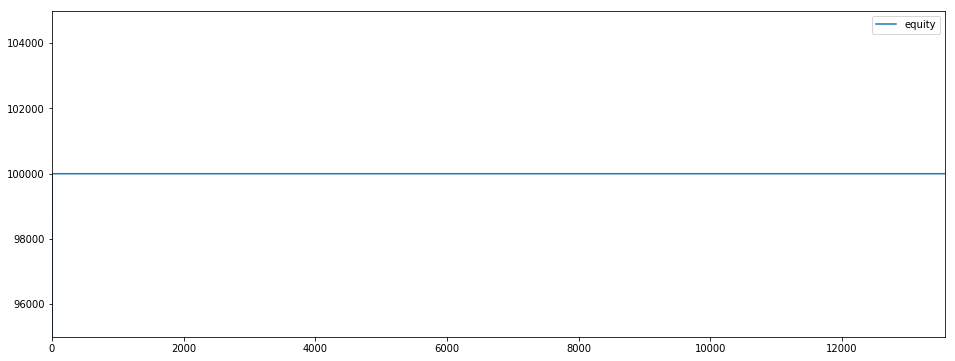

In [98]:
plt.figure(figsize=(16,6))
backtest_graph['equity'].plot(ylim=95000)
plt.legend()

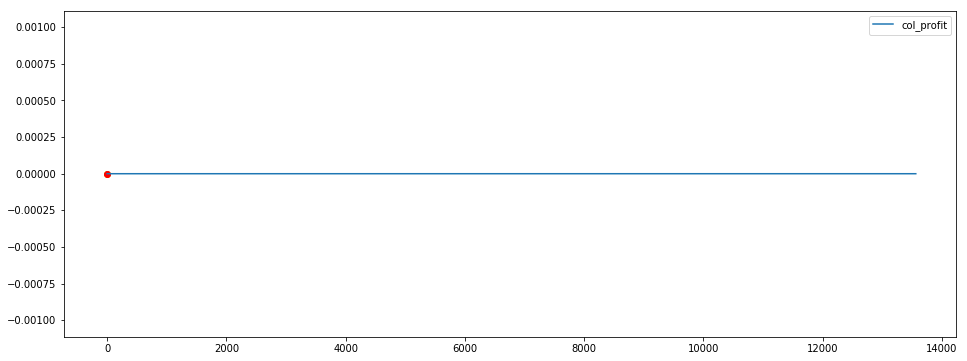

In [99]:
plt.figure(figsize=(16,6))
plt.plot(backtest_graph['col_profit'])
plt.scatter(max_gain[0],max_gain[1],c='y')
plt.scatter(max_loss[0],max_loss[1],c='r')
plt.legend()

In [100]:
print('Score Train : ',score_train,'%')
print('Score Test : ',score_test,'%')
print('Transaction à $100,000')
print('Gain généré',round(equity-100000,2))
print('Nombre de transactions : ',nb_transactions)
print('Fees : ',nb_transactions*1.5)
print('Nombre de positions gagnées',sum(col_is_win))
print('Nombre de positions perdues',sum(col_close_pos)-sum(col_is_win))
print('Gain maximal',round(max(col_profit),2),' ',round(max_gain[1],2))
print('Perte maximale',round(min(col_profit),2),' ',round(max_loss[1],2))
print('Moyenne du gain',statistics.mean(col_profit))
print('Somme de tous les gains',round(gain_sum,2))
print('Somme de tous le loss',round(abs(loss_sum),2))
print('profit factor',round(abs(gain_sum/loss_sum),2))


Score Train :  95.38 %
Score Test :  100.0 %
Transaction à $100,000
Gain généré 0
Nombre de transactions :  0
Fees :  0.0
Nombre de positions gagnées 0
Nombre de positions perdues 0
Gain maximal 0   0
Perte maximale 0   0
Moyenne du gain 0
Somme de tous les gains 0
Somme de tous le loss 0


ZeroDivisionError: division by zero

In [34]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(boost, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)